In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
plt.style.use('fivethirtyeight')

Plotting a Normal Distribution with mean 0 and standard deviation of 2

Text(0.5, 1.0, 'Normal Distribustion')

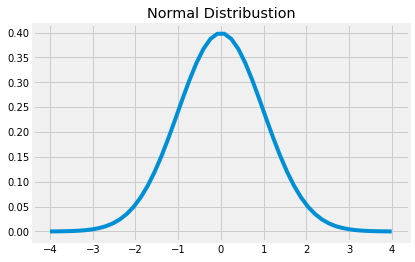

In [2]:
x = np.linspace(-4,4,50)

normal = stats.norm.pdf(x)
plt.plot(x, normal)
plt.title('Normal Distribustion')

As we can observe from the above chart, the distribution is symmetric. Distributions that are not symmetric are called skewed ditributions. <br>

In [3]:
left = stats.lognorm.ppf(0.01, 0.7, loc = -0.1)

In [4]:
right = stats.lognorm.ppf(0.99, 0.7, loc = -0.1)

In [5]:
x = np.linspace(left,right,150)

In [6]:
lognormal = stats.lognorm.pdf(x,0.7)

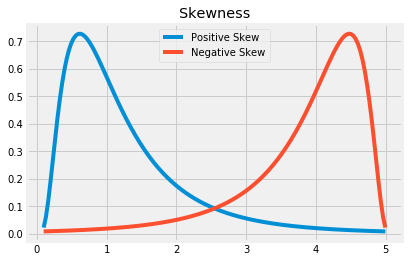

In [7]:
plt.plot(x,lognormal, label = "Positive Skew")
plt.plot(x,lognormal[::-1], label = "Negative Skew")
plt.title("Skewness")
plt.legend()


Plotting real stock market data.

In [8]:
import pandas_datareader as web

In [9]:
spy_price = web.get_data_yahoo('SPY',
                              start = '2012-1-1')

In [10]:
spy_returns = spy_price['Adj Close'].pct_change()[1:]

SPY returns Skewness : -0.408
SPY mean daily returns : 0.00058
SPY median daily returns : 0.00059


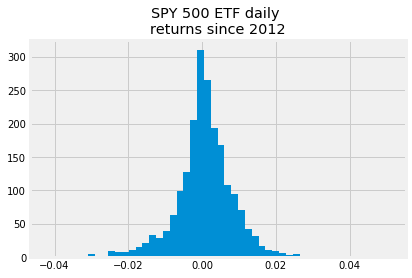

In [11]:
print(f"SPY returns Skewness : {round(stats.skew(spy_returns), 3)}")
print(f"SPY mean daily returns : {round(np.mean(spy_returns), 5)}")
print(f"SPY median daily returns : {round(np.median(spy_returns), 5)}")

plt.hist(spy_returns, bins=50)
plt.title("SPY 500 ETF daily \nreturns since 2012");

In [12]:
round(stats.skew(spy_returns), 3)

-0.408

Kurtosis describe the peak of a distribution. All normal distributions have a kurtosis of 3. Leptokurtic distributions have a kurtosis greater than 3. Platykurtic distribution has kurtosis lower than 3.

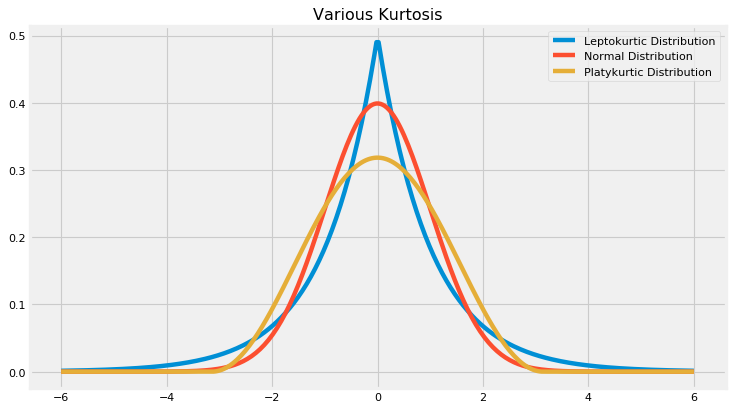

In [13]:
x = np.linspace(-6,6, 300)
normal = stats.norm.pdf(x)
plt.figure(figsize=(10,6), dpi = 80)
plt.plot(x,stats.laplace.pdf(x), label = "Leptokurtic Distribution")
plt.plot(x,normal, label = "Normal Distribution")
plt.plot(x,stats.cosine.pdf(x), label = "Platykurtic Distribution")
plt.title("Various Kurtosis")
plt.legend();

In [14]:
sp_500_k = round(stats.kurtosis(spy_returns),3)
print(f"Excess Kurtosis for S&P 500 returns since 2012 is {sp_500_k}")

Excess Kurtosis for S&P 500 returns since 2012 is 3.385


## Normality Testing using Jarque-Bera test

The Jarque-Bera test can be used to compare whether sample data has skewness and kurtosis similar to the normal distribution. <br>
The JB test's null hypothesis is that the data came from a normal distribution.

Using a 5% cutoff for our p-value we can perform the test as below.

We will simulate an experiment, to generate 1000 random normal numbers, 1000 times. We will calculate the pvalues and check what portion of pvalues are below our significance level (5%)

In [27]:
from statsmodels.stats.stattools import jarque_bera

numbers = 1000
times = 1000
pvalues = np.zeros((numbers))

for i in range(times):
    X = np.random.normal(0,1,numbers)
    _,pvalue,_,_ = jarque_bera(X)
    pvalues[i] = pvalue

# Tally number of pvalues below the 0.05 cutoff.    
low_pval = pvalues[pvalues < 0.05]

n_significant = len(low_pval)/numbers
print(f"Average p-value is : {n_significant}")

Average p-value is : 0.049


Here we can see that we are wrong about 5% of the time.<br>
Next we will test the Jarque-Bera on our S&P 500 data.

In [32]:
_,pvalue,_,_ = jarque_bera(spy_returns)

if pvalue > 0.05:
    print("S&P 500 Returns are likely Normal")
else:
    print("S&P 500 Returns are likely not normal")

S&P 500 Returns are likely not normal


We can see that S&P 500 returns are likely not normal.